In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

np.random.seed(0)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

# Simple CNN for Edgelovers

## a) Generation of data

In [2]:
def generate_data(xlen, ylen, n):
    data = np.zeros(shape=(n, xlen, ylen, 1), dtype=np.uint8)
    labels = np.zeros(shape=(n), dtype=np.int).squeeze()
    
    for i in range(n):
        img = np.random.random((xlen, ylen, 1)) * 128
        
        v_or_h = np.random.randint(0, 2)
        lines = 10
        
        if v_or_h: # horizontal
            label = 0.0
            for _ in range(lines):
                y = np.random.randint(2, ylen - 2)
                x1 = np.random.randint(2, xlen - 10)
                x2 = x1 + 10
                img[y, x1:x2] = 255.0
        else:  # vertical
            label = 1.0
            for _ in range(lines):
                x = np.random.randint(2, xlen - 2)
                y1 = np.random.randint(2, ylen - 10)
                y2 = y1 + 10
                img[y1:y2, x] = 255.0
        
        data[i] = img.copy()
        labels[i] = label
    return data, labels.squeeze()

In [3]:
x0, y0 = generate_data(50, 50, 1000)
x2, y2 = generate_data(50, 50, 1000);

Label: 0


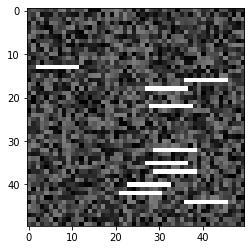

In [4]:
img = x0[0, :, :, 0]
plt.imshow(img, cmap='gray')
print("Label: {}".format(y0[0]))

## b) Build the simplest possible CNN

In [5]:
n_kernel = 2
n_epochs = 1000
batch_size = 5
lr = 0.1

model = Sequential()
model.add(Conv2D(n_kernel, kernel_size=5, strides=2, activation='relu', input_shape=(50, 50, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=8, strides=8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', lr=lr, metrics=['accuracy'])
model.summary()

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
history = model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

In [ ]:
score_train = model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

## c) Visualize the learned kernel

In [ ]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        axes[j].imshow(f, cmap='gray');
        count += 1

In [ ]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        index = np.where(y0 == 1)[0][0]
        img = x0[index, :, :, 0]
        grad = signal.convolve2d(img, f, boundary='symm', mode='same')
        axes[j].imshow(grad, cmap='gray')
        count += 1

In [ ]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        index = np.where(y0 == 0)[0][0]
        img = x0[index, :, :, 0]
        grad = signal.convolve2d(img, f, boundary='symm', mode='same')
        axes[j].imshow(grad, cmap='gray')
        count += 1